<a href="https://colab.research.google.com/github/2SEHI/K-Digital_Lecture/blob/main/0822_keras%EB%B3%B5%EC%8A%B5/keras(%EB%A1%9C%EC%9D%B4%ED%84%B0%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로이터 데이터셋을 이용한 다중분류


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.rcParams['axes.unicode_minus'] = False

## colab용 글씨체 설정
plt.rc('font', family='NanumBarunGothic') 

import warnings
warnings.filterwarnings(action='ignore')

np.random.seed(42)

## 1.다중분류


### 1) 단일 레이블 다중 분류
- 각 데이터 포인트가 정확히 하나의 범주로 분류되는 것

### 2) 다중 레이블 다중 분류
- 각 데이터 포인트가 여러 개의 범주에 속하는 것

## 2.로이터 데이터셋
- 46개의 토픽에 대한 뉴스 기사 데이터

### 1) 데이터 가져오기

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

### 2) 데이터 크기확인

In [3]:
train_data.shape

(8982,)

In [4]:
train_data[:5]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

### 3) 단어 인덱스를 영어 단어로 변환하기

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### 4) 레이블 : 토픽인덱스

In [6]:
train_labels[0]

3

## 3.데이터 준비

### 1) 피처 원핫 인코딩

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    # print(dimension)
    # (8982, 10000) 크기의 행렬 만들기
    results = np.zeros((len(sequences), dimension))
    # 각 문장마다 단어부분에 1로 변환해주기
    for i, sequence in enumerate(sequences):
        
        # i는 문장
        # sequence는 단어 인덱스
        results[i, sequence] = 1,
    return results

X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

### 1) 직접 원핫인코딩

In [8]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

### 2) keras 내장함수를 이용한 원핫인코딩
- train_data와 test_data는 넘파이배열이라서 to_categorical을 이용하지 못합니다.

In [9]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## 4.모델 구성
- 출력 클래스의 개수가 46개이므로 출력 공간의 차원도 46개입니다.
- 한 층이 분류 문제에 필요한 일부 정보를 누락하면 그 다음 층에서 누락된 정보는 복원할 수 없으므로 입력층과 은닉층의 은닉 유닛을 46보다 크게 잡아야 합니다.
- 출력층은 클래스의 개수대로 46개를 지정합니다.
- 출력층에 softmax를 지정하였으므로 각 입력 샘플마다 46개의 출력클래스에 대한 확률 포를 출력합니다.


In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

## 5.모델 컴파일
- 손실함수는 categorical_crossentropy를 지정하였으므로 두 확률 분포사이의 거리를 측정합니다.

In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 6.훈련 검증

### 1) 검증데이터 준비

In [12]:
X_val = X_train[:1000]
partial_X_train = X_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

## 7.모델 훈련

In [13]:
history = model.fit(partial_X_train, partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(X_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 58ms/step - loss: 2.5414 - accuracy: 0.5198 - val_loss: 1.6803 - val_accuracy: 0.6320
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 1.3974 - accuracy: 0.7114 - val_loss: 1.2693 - val_accuracy: 0.7320
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 1.0422 - accuracy: 0.7804 - val_loss: 1.1055 - val_accuracy: 0.7740
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8244 - accuracy: 0.8256 - val_loss: 1.0131 - val_accuracy: 0.7830
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6522 - accuracy: 0.8661 - val_loss: 0.9550 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5212 - accuracy: 0.8933 - val_loss: 0.9074 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 1s 43ms/step - loss: 0.4128 - accuracy: 0.9161 - val_loss: 0.8873 - val_accuracy: 0.8160
Epoch 8/20
16

In [14]:
model.evaluate(X_val, y_val)

32/32 [==============================] - 0s 3ms/step - loss: 1.0291 - accuracy: 0.8100


[1.02913236618042, 0.8100000023841858]

## 8.손실과 정확도 그래프 그리기


###  1) 훈련과 검증 손실 그리기

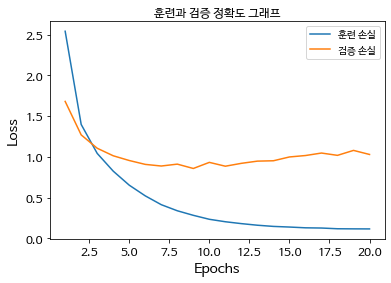

In [22]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='훈련 손실')
plt.plot(epochs, val_loss, label='검증 손실')

plt.title('훈련과 검증 정확도 그래프')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

###  2) 훈련과 검증 정확도 그리기

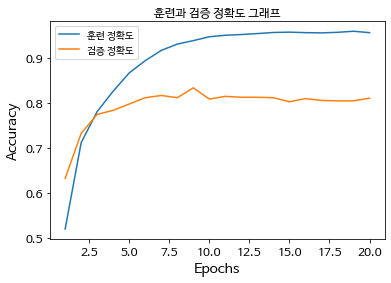

In [23]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='훈련 정확도')
plt.plot(epochs, val_acc, label='검증 정확도')

plt.title('훈련과 검증 정확도 그래프')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 9.예측

In [26]:
prediction = model.predict(X_test)
prediction

array([[4.11982273e-06, 1.36210010e-05, 1.52506736e-08, ...,
        3.48424692e-07, 1.77831101e-08, 7.74274511e-08],
       [8.78150240e-05, 5.99318091e-03, 1.09543053e-05, ...,
        1.92871252e-09, 1.64996372e-09, 4.54048887e-07],
       [5.98590821e-04, 4.56445694e-01, 5.93651959e-04, ...,
        2.24750352e-06, 1.17942836e-05, 5.53619757e-04],
       ...,
       [2.81396353e-07, 1.24102908e-05, 1.48571942e-07, ...,
        1.22060601e-06, 5.71938870e-08, 7.92708761e-08],
       [1.61367767e-02, 1.23964235e-01, 4.65461891e-03, ...,
        4.34201560e-04, 9.87624808e-05, 5.22047303e-05],
       [2.52691039e-04, 9.26056504e-01, 1.89894601e-03, ...,
        5.90617162e-07, 1.14342820e-05, 4.93576727e-06]], dtype=float32)

## 레이블과 손실
- 범주형 인코딩이 되어 있는 경우에는 손실함수를 categorical_crossentropy를 사용합니다
- 정수 레이블을 사용할 때는 sparse_categorical_crossentory를 사용합니다.

In [ ]:
y_train = np.array(train_rables)
y_test = np.array(test_rables)


model.compile(aptimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])